Decision Tree (ID3):
{'Outlook': {'Sunny': {'Temperature': {'Hot': 'No', 'Mild': {'Wind': {'Weak': 'No', 'Strong': 'Yes'}}, 'Cool': 'Yes'}}, 'Overcast': 'Yes', 'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


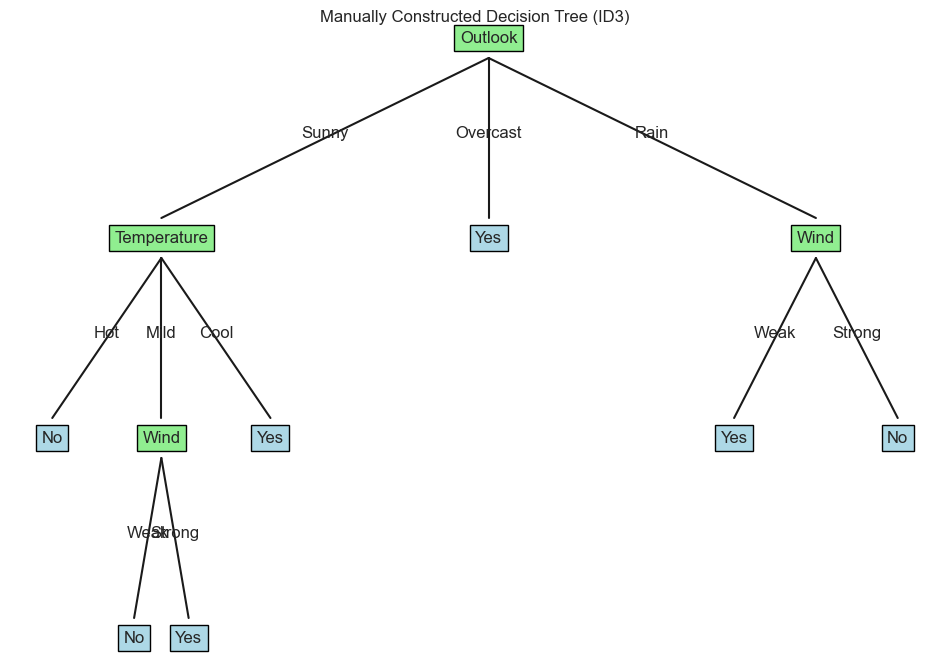

Classification result for new sample: No


In [2]:
import pandas as pd
from collections import Counter
from math import log2
import matplotlib.pyplot as plt
import seaborn as sns

def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    ent = -sum((count / total) * log2(count / total) for count in counts.values())
    return ent

def info_gain(data, target, feature):
    total_entropy = entropy(data[target])
    values = data[feature].unique()
    weighted_entropy = sum((len(data[data[feature] == value]) / len(data)) * 
                           entropy(data[data[feature] == value][target]) for value in values)
    return total_entropy - weighted_entropy

def id3(data, target, features):
    if len(data[target].unique()) == 1:
        return data[target].iloc[0]
    
    if not features:
        return data[target].mode()[0]
    
    best_feature = max(features, key=lambda f: info_gain(data, target, f))
    
    tree = {best_feature: {}}
    
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        subtree = id3(subset, target, [f for f in features if f != best_feature])
        tree[best_feature][value] = subtree  
    return tree

def plot_manual_tree(tree, x=0.5, y=1.0, width=1.0, depth=0, parent=None):
    if not isinstance(tree, dict):
        plt.text(x, y, tree, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black'))
        return
    
    feature = next(iter(tree))
    plt.text(x, y, feature, ha='center', va='center', bbox=dict(facecolor='lightgreen', edgecolor='black'))
    
    num_branches = len(tree[feature])
    branch_width = width / num_branches
    
    for i, (value, subtree) in enumerate(tree[feature].items()):
        new_x = x - width / 2 + (i + 0.5) * branch_width
        new_y = y - 0.2
        
        # Draw line from parent to child node
        plt.plot([x, new_x], [y - 0.02, new_y + 0.02], 'k-')
        plt.text((x + new_x) / 2, (y + new_y) / 2, value, ha='center')
        
        # Recursive call for subtree
        plot_manual_tree(subtree, new_x, new_y, branch_width, depth + 1, x)

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

target = 'PlayTennis'
features = ['Outlook', 'Temperature', 'Humidity', 'Wind']

tree = id3(df, target, features)
print("Decision Tree (ID3):")
print(tree)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plot_manual_tree(tree, x=0.5, y=1.0, width=1.0)
plt.title("Manually Constructed Decision Tree (ID3)")
plt.axis('off')
plt.show()

new_sample = {
    'Outlook': input("Enter value for Outlook (Sunny/Overcast/Rain): "),
    'Temperature': input("Enter value for Temperature (Hot/Mild/Cool): "),
    'Humidity': input("Enter value for Humidity (High/Normal): "),
    'Wind': input("Enter value for Wind (Weak/Strong): ")
}

def classify(tree, sample):
    if not isinstance(tree, dict):
        return tree
    feature = next(iter(tree))
    value = sample[feature]
    if value in tree[feature]:
        return classify(tree[feature][value], sample)
    return None

print(f"Classification result for new sample: {classify(tree, new_sample)}")


1) Dataset: A table containing weather features (Outlook, Temperature, Humidity, Wind) along with the target variable, PlayTennis.
2) Entropy & Information Gain: The ID3 algorithm calculates entropy and information gain to determine the best feature for splitting the dataset at each node.
3) Decision Tree Construction: The dataset is recursively split based on the optimal feature until all instances are classified.
4) New Sample Classification: Once the decision tree is built, it predicts whether tennis can be played (Yes or No) based on a new weather condition provided by the user (e.g., Sunny, Cool, etc.).

Inputs Given:
Rain
Cool
High
Strong

Output:
No